# NFL Home Field Advantage Investigation

### Loading in Packages and Data

In [1]:
# import the normal packages
import pandas as pd
import nflfastpy as nfl
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import nflfastpy as nfl

/Users/tej/opt/anaconda3/lib/python3.9/site-packages/nflfastpy/__init__.py:16: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``PIL.Image.open(urllib.request.urlopen(url))``.
  default_headshot = mpl_image.imread(headshot_url)


In [2]:
df_21 = nfl.load_pbp_data(2021)
df_20 = nfl.load_pbp_data(2020)
df_19 = nfl.load_pbp_data(2019)
df_18 = nfl.load_pbp_data(2018)
df_17 = nfl.load_pbp_data(2017)

pbp = pd.concat([df_17, df_18, df_19, df_20, df_21])

In [3]:
teams_colors_logos = nfl.load_team_logo_data()

In [4]:
att_21 = pd.read_html("http://www.espn.com/nfl/attendance/_/year/2021")[0]
att_20 = pd.read_html("http://www.espn.com/nfl/attendance/_/year/2020")[0]
att_19 = pd.read_html("http://www.espn.com/nfl/attendance/_/year/2019")[0]
att_18 = pd.read_html("http://www.espn.com/nfl/attendance/_/year/2018")[0]
att_17 = pd.read_html("http://www.espn.com/nfl/attendance/_/year/2017")[0]

In [81]:
print(type(att_21))

<class 'pandas.core.frame.DataFrame'>


In [5]:
new_header_21 = att_21.iloc[1]
att_21 = att_21[2:]
att_21.columns = new_header_21
att_21 = att_21.iloc[: , :6]
att_21["season"] = 2021

new_header_20 = att_20.iloc[1]
att_20 = att_20[2:]
att_20.columns = new_header_20
att_20 = att_20.iloc[: , :6]
att_20["season"] = 2020

new_header_19 = att_19.iloc[1]
att_19 = att_19[2:]
att_19.columns = new_header_19
att_19 = att_19.iloc[: , :6]
att_19["season"] = 2019

new_header_18 = att_18.iloc[1]
att_18 = att_18[2:]
att_18.columns = new_header_18
att_18 = att_18.iloc[: , :6]
att_18["season"] = 2018

new_header_17 = att_17.iloc[1]
att_17 = att_17[2:]
att_17.columns = new_header_17
att_17 = att_17.iloc[: , :6]
att_17["season"] = 2017

att = pd.concat([att_17, att_18, att_19, att_20, att_21])

att['AVG'] = att['AVG'].replace(['-'],'0')
att['TOTAL'] = att['TOTAL'].replace(['-'],'0')

att['AVG'] = att['AVG'].astype(int)
att['TOTAL'] = att['TOTAL'].astype(int)

# def update_header(df):
#     new_header = df.iloc[1]
#     df2 = df[2:]
#     df2.columns = new_header
#     print(df2)

# att_21.apply(update_header)

In [6]:
def city_to_abb(col):
    if col == "Arizona":
        return "ARI"
    elif col == "Atlanta":
        return "ATL"
    elif col == "Baltimore":
        return "BAL"
    elif col == "Buffalo":
        return "BAL"
    elif col == "Carolina":
        return "CAR"
    elif col == "Chicago":
        return "CAR"
    elif col == "Cleveland":
        return "CLE"
    elif col == "Dallas":
        return "DAL"
    elif col == "Denver":
        return "DEN"
    elif col == "Detroit":
        return "DET"
    elif col == "Green Bay":
        return "GB"
    elif col == "Houston":
        return "HOU"
    elif col == "Indianapolis":
        return "IND"
    elif col == "Jacksonville":
        return "JAX"
    elif col == "Kansas City":
        return "KC"
    elif col == "Las Vegas":
        return "LV"
    elif col == "Los Angeles":
        return "NA"
    elif col == "Miami":
        return "MIA"
    elif col == "Minnesota":
        return "MIN"
    elif col == "NY Giants":
        return "NYG"
    elif col == "NY Jets":
        return "NYJ"
    elif col == "New England":
        return "NE"
    elif col == "New Orleans":
        return "NO"
    elif col == "Philadelphia":
        return "PHI"
    elif col == "Pittsburgh":
        return "PIT"
    elif col == "San Francisco":
        return "SF"
    elif col == "Seattle":
        return "SEA"
    elif col == "Tampa Bay":
        return "TB"
    elif col == "Tennessee":
        return "TEN"
    elif col == "Washington":
        return "WAS"
    
    
att['abb'] = att['TEAM'].apply(city_to_abb)

### Doing Explatory Data Analysis on the Datasets

In [7]:
pbp.head()

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
0,1,2017_01_ARI_DET,2017091004,DET,ARI,REG,1,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,37,2017_01_ARI_DET,2017091004,DET,ARI,REG,1,ARI,away,DET,...,0,0,-0.287176,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,73,2017_01_ARI_DET,2017091004,DET,ARI,REG,1,ARI,away,DET,...,0,0,0.025196,1.259455,8.791068,7.0,0.652521,0.226989,0.492213,50.778741
3,97,2017_01_ARI_DET,2017091004,DET,ARI,REG,1,ARI,away,DET,...,0,0,-0.362216,NaN,NaN,NaN,NaN,NaN,0.580985,-58.098513
4,118,2017_01_ARI_DET,2017091004,DET,ARI,REG,1,ARI,away,DET,...,0,0,1.880075,0.262409,4.623932,2.0,0.998581,0.998581,0.955220,4.477972


In [8]:
pbp[["posteam", "defteam", "pass", "rush", "epa"]].head()

,posteam,defteam,pass,rush,epa
0,NaN,NaN,0,0,NaN
1,ARI,DET,0,0,-0.287176
2,ARI,DET,1,0,0.025196
3,ARI,DET,0,1,-0.362216
4,ARI,DET,1,0,1.880075


In [9]:
pbp.groupby(['posteam', 'season'])[['epa']].mean().sort_values(by='epa', ascending=False)

,,epa
posteam,season,
KC,2018,0.173506
GB,2020,0.149553
KC,2020,0.131675
NE,2017,0.129105
BAL,2019,0.128151
...,...,...
PIT,2019,-0.133364
NYG,2017,-0.138276
CLE,2017,-0.139975


In [10]:
att.sort_values('AVG', ascending = False)

1,RK,TEAM,GMS,TOTAL,AVG,PCT,season,abb
2,1,Dallas,8,747368,93421,93.4,2021,DAL
2,1,Dallas,8,741775,92721,92.7,2017,DAL
2,1,Dallas,8,732958,91619,91.6,2018,DAL
2,1,Dallas,8,727432,90929,90.9,2019,DAL
3,2,NY Jets,8,628184,78523,95.2,2019,NYJ
...,...,...,...,...,...,...,...,...
28,27,NY Giants,8,0,0,-,2020,NYG
29,28,NY Jets,8,0,0,-,2020,NYJ
30,29,Philadelphia,8,0,0,-,2020,PHI
31,30,Los Angeles,8,0,0,-,2020,NA


In [11]:
att[(att['season'] == 2021)].sort_values('TOTAL', ascending = False).head(10)

1,RK,TEAM,GMS,TOTAL,AVG,PCT,season,abb
2,1,Dallas,8,747368,93421,93.4,2021,DAL
4,3,Denver,9,686129,76236,100.1,2021,DEN
6,5,Kansas City,9,659044,73227,100.4,2021,KC
8,7,NY Jets,9,645092,71676,86.9,2021,NYJ
10,9,Baltimore,9,634840,70537,99.7,2021,BAL
11,10,Los Angeles,9,632160,70240,98.2,2021,NA
3,2,Green Bay,8,623929,77991,95.8,2021,GB
13,12,Tennessee,9,617102,68566,99.2,2021,TEN
15,14,Buffalo,9,610352,67816,94.7,2021,BAL
17,16,Cleveland,9,606879,67431,100.0,2021,CLE


### Seeing if Home Field Advantage is Real on Offense

In [85]:
pbp_rp = pbp[(pbp['play_type'] == "pass") | (pbp['play_type'] == "run") & (pbp['epa'].notnull())]

pbp_rp['home_team_is_offense'] = np.select(
    [pbp_rp.home_team == pbp_rp.posteam,
    pbp_rp.home_team != pbp_rp.posteam], 
    [1, 0], 
    default=0
)

home_epa = pbp_rp[(pbp_rp['home_team_is_offense'] == 1)].groupby(['posteam', 'season'], as_index=False)['epa'].agg({'count', 'mean'}).reset_index()
home_epa.columns = ['team', 'season', 'home_plays', 'home_epa']
away_epa = pbp_rp[(pbp_rp['home_team_is_offense'] == 0)].groupby(['posteam', 'season'], as_index=False)['epa'].agg({'count', 'mean'}).reset_index()
away_epa.columns = ['team', 'season', 'away_plays', 'away_epa']

epa_season = pd.merge(home_epa, away_epa, on = ['team', 'season'])

epa_season['home_minus_away'] = epa_season.home_epa - epa_season.away_epa

print(epa_season['home_minus_away'].mean())

epa_season['label'] = epa_season['team'] + epa_season['season'].astype(str).str.zfill(1)

print(len(epa_season[(epa_season['home_minus_away'] > 0)]) / len(epa_season))


/var/folders/8_/623nwj997kq9gmndy1h3f4f00000gn/T/ipykernel_12452/2384138725.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pbp_rp['home_team_is_offense'] = np.select(


-0.017713061358542954
0.39375


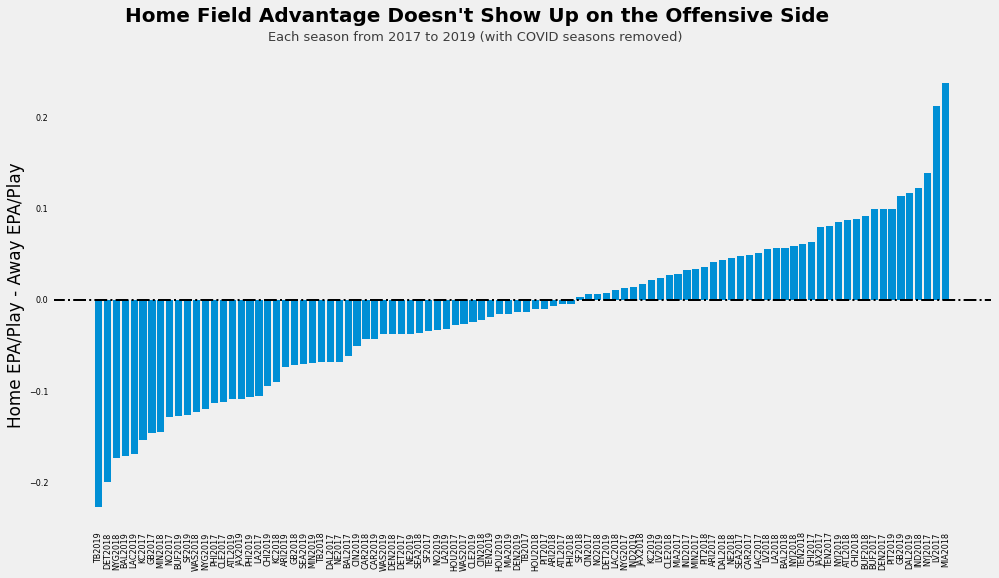

In [82]:
df_sorted = epa_season.sort_values('home_minus_away')
df_sorted = df_sorted[(df_sorted['season'] < 2020)]
plt.rcParams["figure.figsize"] = (15,8)
plt.style.use('fivethirtyeight') 
plt.bar(df_sorted['label'], df_sorted['home_minus_away'])
plt.xticks(df_sorted['label'], rotation = 90)
plt.text(x=3, y=0.3, s="Home Field Advantage Doesn't Show Up on the Offensive Side", fontsize=20, weight='bold', va='bottom')
plt.text(x=19, y=0.28, s='Each season from 2017 to 2019 (with COVID seasons removed)', fontsize=13, alpha=0.75, va='bottom')
# plt.title("Home Field Advantage Doesn't Show Up on the Offensive Side")
plt.ylabel("Home EPA/Play - Away EPA/Play")
plt.tick_params(axis='both', which='major', labelsize=8)
plt.axhline(y=0, c="black", linestyle="dashdot", lw = 2)
plt.grid(False)
plt.show()

/var/folders/8_/623nwj997kq9gmndy1h3f4f00000gn/T/ipykernel_12452/3592639528.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  wide = wide.drop('season', 1)


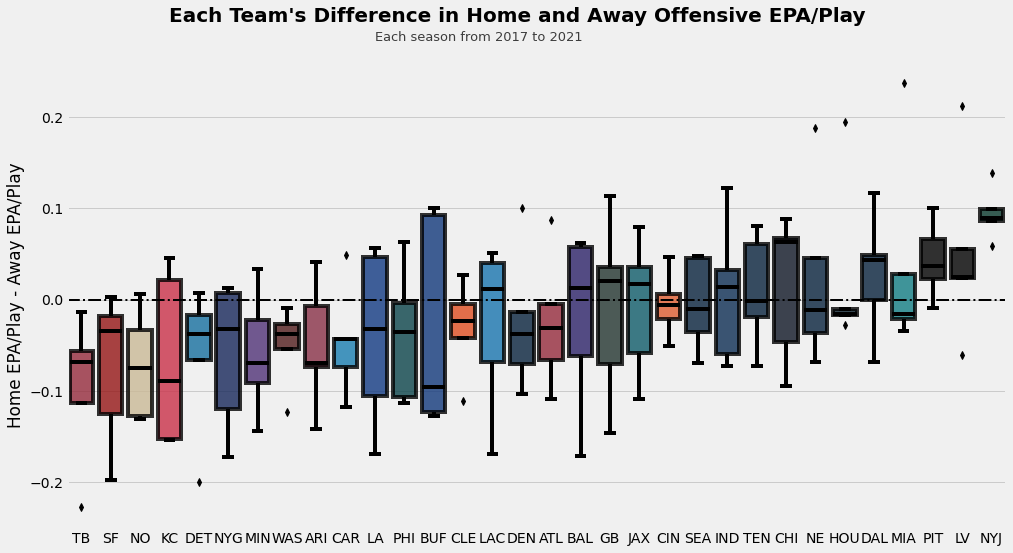

In [26]:
small = epa_season[["team", "season", "home_minus_away"]]

wide = small.pivot(index='season', columns = "team", values='home_minus_away').reset_index()

wide = wide.drop('season', 1)

sorted_index = wide.mean().sort_values(ascending=True).index

wide_sorted=wide[sorted_index]

teams_colors = (teams_colors_logos[['team_abbr', 'team_color']]).set_index('team_abbr').to_dict()['team_color']

b = sns.boxplot(data=wide_sorted, palette = teams_colors, boxprops=dict(alpha=.8))
b.text(x=3, y=0.3, s="Each Team's Difference in Home and Away Offensive EPA/Play", fontsize=20, weight='bold', va='bottom')
b.text(x=10, y=0.28, s='Each season from 2017 to 2021', fontsize=13, alpha=0.75, va='bottom')
b.set_xlabel("")
b.set_ylabel("Home EPA/Play - Away EPA/Play")
b.axhline(y=0, c="black", linestyle="dashdot", lw = 2)

plt.show()

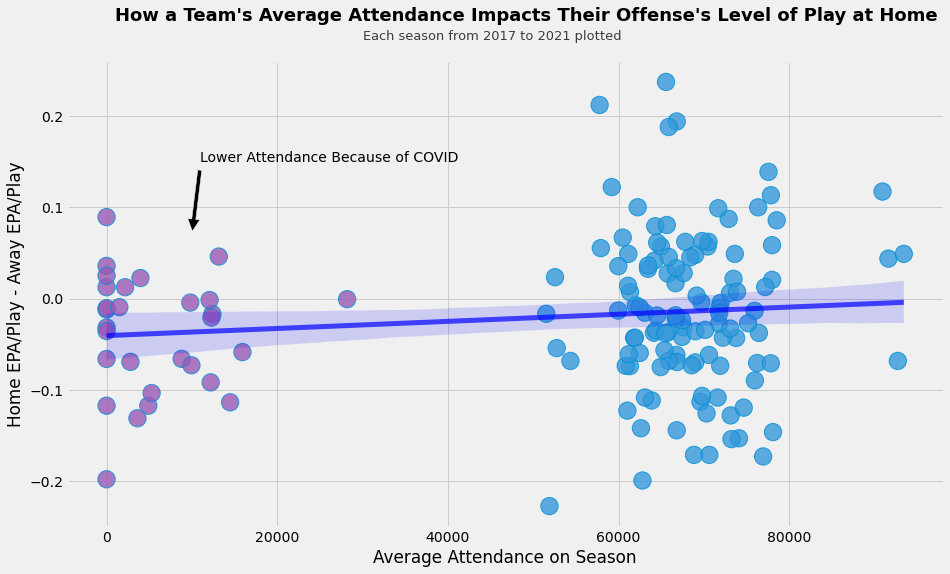

In [28]:
epa_att = pd.merge(epa_season, att, left_on = ['team', 'season'], right_on = ['abb', 'season'])
value=(epa_att['AVG']<40000)
epa_att['color']= np.where( value==True , "#9b59b6", "#3498db")

plt.figure(figsize=((14, 8)))
sns.regplot(x=epa_att["AVG"], y=epa_att["home_minus_away"], 
            line_kws={"color":"b","alpha":0.7,"lw":5},
           scatter_kws={'facecolors':epa_att['color'], 's': 300})
plt.annotate('Lower Attendance Because of COVID', xy=(10000, 0.07), xytext=(11000, 0.15),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.text(x=1000, y=0.3, s="How a Team's Average Attendance Impacts Their Offense's Level of Play at Home", fontsize=18, weight='bold', va='bottom')
plt.text(x=30000, y=0.28, s='Each season from 2017 to 2021 plotted', fontsize=13, alpha=0.75, va='bottom')
plt.ylabel("Home EPA/Play - Away EPA/Play")
plt.xlabel("Average Attendance on Season")
plt.show()

Text(0.5, 0, 'Average Attendance on Season')

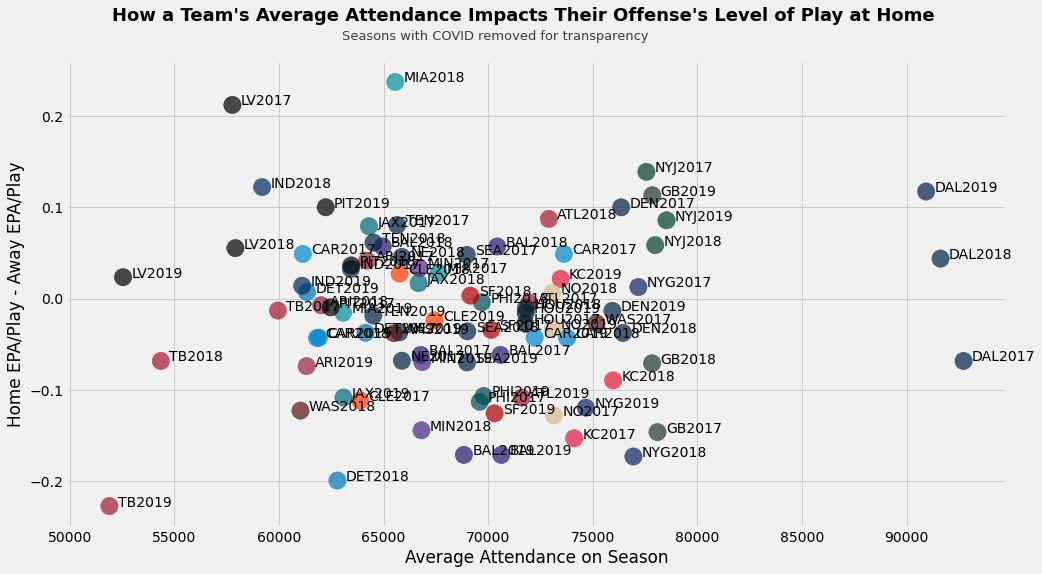

In [29]:
epa_att = pd.merge(epa_season, att, left_on = ['team', 'season'], right_on = ['abb', 'season'])
epa_att_17_19 = epa_att[(epa_att['season'] < 2020)]
epa_att_17_19 = pd.merge(epa_att_17_19, teams_colors_logos, left_on = 'team', right_on = 'team_abbr')

fig, ax = plt.subplots(figsize=(15,8))

ax.scatter(epa_att_17_19["AVG"], epa_att_17_19["home_minus_away"], 
           alpha=.7, 
           s = 300,
           color=epa_att_17_19.team_color)
ax.text(x=52000, y=0.3, s="How a Team's Average Attendance Impacts Their Offense's Level of Play at Home", fontsize=18, weight='bold', va='bottom')
ax.text(x=63000, y=0.28, s='Seasons with COVID removed for transparency', fontsize=13, alpha=0.75, va='bottom')
for line in range(0,epa_att_17_19.shape[0]):
    plt.text(epa_att_17_19.AVG[line]+400, epa_att_17_19.home_minus_away[line], epa_att_17_19.label[line])
ax.set_ylabel("Home EPA/Play - Away EPA/Play")
ax.set_xlabel("Average Attendance on Season")

### Seeing if Home Field Advantage is Real on Defense

In [87]:
home_epa_def = pbp_rp[(pbp_rp['home_team_is_offense'] == 0)].groupby(['defteam', 'season'], as_index=False)['epa'].agg({'count', 'mean'}).reset_index()
home_epa_def.columns = ['team', 'season', 'home_plays', 'home_def_epa']
away_epa_def = pbp_rp[(pbp_rp['home_team_is_offense'] == 1)].groupby(['defteam', 'season'], as_index=False)['epa'].agg({'count', 'mean'}).reset_index()
away_epa_def.columns = ['team', 'season', 'away_plays', 'away_def_epa']

epa_season_def = pd.merge(home_epa_def, away_epa_def, on = ['team', 'season'])

epa_season_def['home_minus_away'] = -(epa_season_def.home_def_epa - epa_season_def.away_def_epa)

print(epa_season_def['home_minus_away'].mean())

epa_season_def['label'] = epa_season_def['team'] + epa_season_def['season'].astype(str).str.zfill(1)

print(len(epa_season_def[(epa_season_def['home_minus_away'] > 0)]) / len(epa_season_def))

-0.014779862466703136
0.45625


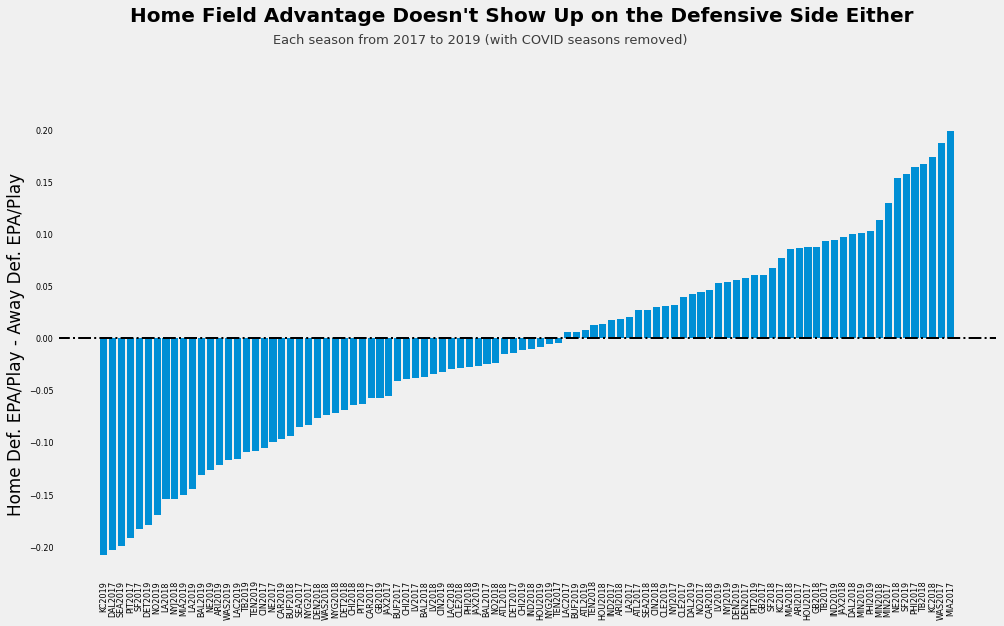

In [31]:
df_sorted_def = epa_season_def.sort_values('home_minus_away')
df_sorted_def = df_sorted_def[(df_sorted_def['season'] < 2020)]
plt.rcParams["figure.figsize"] = (15,8)
plt.style.use('fivethirtyeight') 
plt.bar(df_sorted_def['label'], df_sorted_def['home_minus_away'])
plt.xticks(df_sorted_def['label'], rotation = 90)
plt.text(x=3, y=0.3, s="Home Field Advantage Doesn't Show Up on the Defensive Side Either", fontsize=20, weight='bold', va='bottom')
plt.text(x=19, y=0.28, s='Each season from 2017 to 2019 (with COVID seasons removed)', fontsize=13, alpha=0.75, va='bottom')
plt.ylabel("Home Def. EPA/Play - Away Def. EPA/Play")
plt.tick_params(axis='both', which='major', labelsize=8)
plt.axhline(y=0, c="black", linestyle="dashdot", lw = 2)
plt.grid(False)
plt.show()

/var/folders/8_/623nwj997kq9gmndy1h3f4f00000gn/T/ipykernel_12452/3739795801.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  wide_def = wide_def.drop('season', 1)


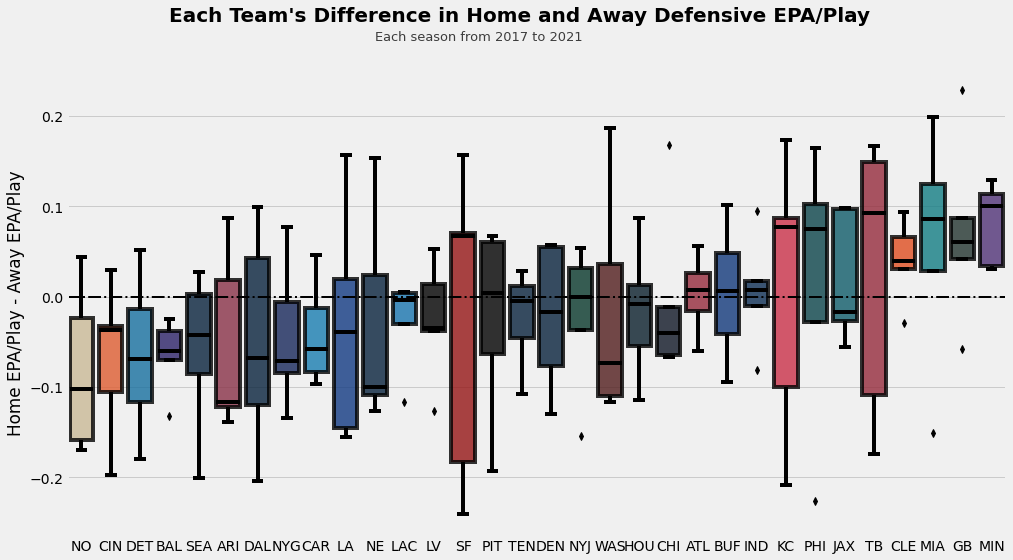

In [32]:
small_def = epa_season_def[["team", "season", "home_minus_away"]]

wide_def = small_def.pivot(index='season', columns = "team", values='home_minus_away').reset_index()

wide_def = wide_def.drop('season', 1)

sorted_index_def = wide_def.mean().sort_values(ascending=True).index

wide_sorted_def=wide_def[sorted_index_def]

teams_colors = (teams_colors_logos[['team_abbr', 'team_color']]).set_index('team_abbr').to_dict()['team_color']

b = sns.boxplot(data=wide_sorted_def, palette = teams_colors, boxprops=dict(alpha=.8))
b.text(x=3, y=0.3, s="Each Team's Difference in Home and Away Defensive EPA/Play", fontsize=20, weight='bold', va='bottom')
b.text(x=10, y=0.28, s='Each season from 2017 to 2021', fontsize=13, alpha=0.75, va='bottom')
b.set_xlabel("")
b.set_ylabel("Home EPA/Play - Away EPA/Play")
b.axhline(y=0, c="black", linestyle="dashdot", lw = 2)

plt.show()

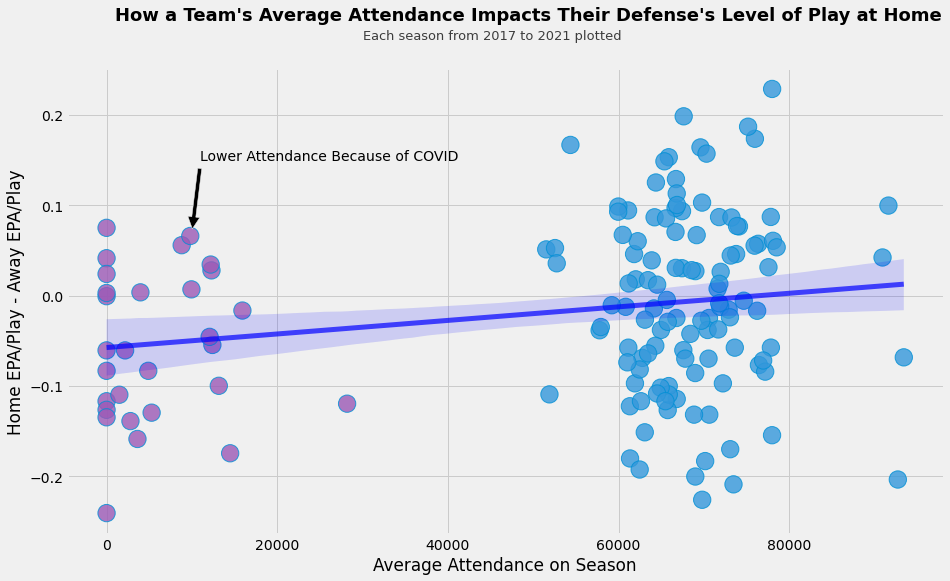

In [33]:
epa_att_def = pd.merge(epa_season_def, att, left_on = ['team', 'season'], right_on = ['abb', 'season'])
value=(epa_att_def['AVG']<40000)
epa_att_def['color']= np.where( value==True , "#9b59b6", "#3498db")

plt.figure(figsize=((14, 8)))
sns.regplot(x=epa_att_def["AVG"], y=epa_att_def["home_minus_away"], 
            line_kws={"color":"b","alpha":0.7,"lw":5},
           scatter_kws={'facecolors':epa_att_def['color'], 's': 300})
plt.annotate('Lower Attendance Because of COVID', xy=(10000, 0.07), xytext=(11000, 0.15),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.text(x=1000, y=0.3, s="How a Team's Average Attendance Impacts Their Defense's Level of Play at Home", fontsize=18, weight='bold', va='bottom')
plt.text(x=30000, y=0.28, s='Each season from 2017 to 2021 plotted', fontsize=13, alpha=0.75, va='bottom')
plt.ylabel("Home EPA/Play - Away EPA/Play")
plt.xlabel("Average Attendance on Season")
plt.show()

Text(0.5, 0, 'Average Attendance on Season')

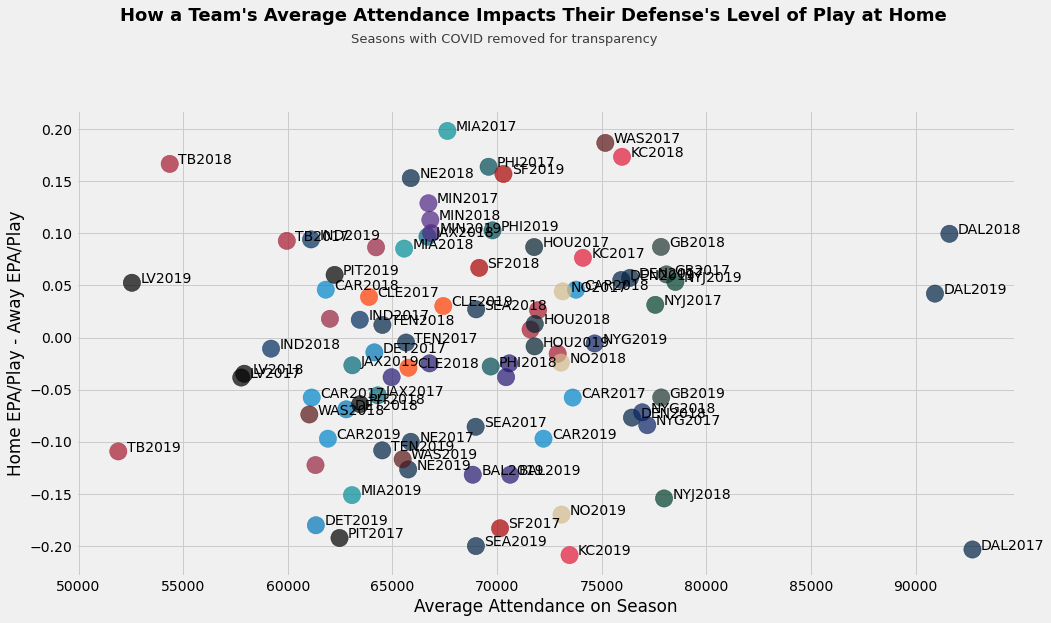

In [34]:
epa_att_def = pd.merge(epa_season_def, att, left_on = ['team', 'season'], right_on = ['abb', 'season'])
epa_att_17_19_def = epa_att_def[(epa_att_def['season'] < 2020)]
epa_att_17_19_def = pd.merge(epa_att_17_19_def, teams_colors_logos, left_on = 'team', right_on = 'team_abbr')

fig, ax = plt.subplots(figsize=(15,8))

ax.scatter(epa_att_17_19_def["AVG"], epa_att_17_19_def["home_minus_away"], 
           alpha=.7, 
           s = 300,
           color=epa_att_17_19_def.team_color)
ax.text(x=52000, y=0.3, s="How a Team's Average Attendance Impacts Their Defense's Level of Play at Home", fontsize=18, weight='bold', va='bottom')
for line in range(10,epa_att_17_19_def.shape[0]):
    plt.text(epa_att_17_19_def.AVG[line]+400, epa_att_17_19_def.home_minus_away[line], epa_att_17_19_def.label[line])
ax.text(x=63000, y=0.28, s='Seasons with COVID removed for transparency', fontsize=13, alpha=0.75, va='bottom')
ax.set_ylabel("Home EPA/Play - Away EPA/Play")
ax.set_xlabel("Average Attendance on Season")

### How Specific Players Perform Home vs. Away

In [60]:
passing = pbp_rp[(pbp_rp['pass'] == 1) & (pbp_rp['season_type'] == "REG")].groupby(['id', 'name'], as_index=False)['epa'].agg({'count', 'mean'}).reset_index()
passing_filt = passing[(passing['count'] > 1000)]
passers_list = passing_filt['id'].tolist()
pbp_passers = pbp_rp[(pbp_rp['id'].isin(passers_list))]
qb_epa_home = pbp_passers[(pbp_passers['home_team_is_offense'] == 1)].groupby(['id', 'name'], as_index=False)['epa'].agg({'count', 'mean'}).reset_index()
qb_epa_home.columns = ['id', 'passer', 'home_plays', 'home_epa']
qb_epa_away = pbp_passers[(pbp_passers['home_team_is_offense'] == 0)].groupby(['id', 'name'], as_index=False)['epa'].agg({'count', 'mean'}).reset_index()
qb_epa_away.columns = ['id', 'passer', 'away_plays', 'away_epa']

qb_colors = pbp_passers.groupby(['id', 'posteam'], as_index = False)['epa'].agg({'count'}).reset_index().groupby(['id']).head(1)
qb_colors = pd.merge(qb_colors, teams_colors_logos, left_on = "posteam", right_on = "team_abbr")[["id", "posteam", "team_color"]]

qb_epa = pd.merge(qb_epa_home, qb_epa_away, on = ['id', 'passer'])
qb_epa = pd.merge(qb_epa, qb_colors, on = "id")

qb_epa = qb_epa[(qb_epa['passer'] != "Aa.Rodgers")]

qb_epa['home_perc'] = qb_epa['home_plays'] / qb_epa['home_plays'] + qb_epa['away_plays']

Text(0, 0.5, 'Away EPA/Play')

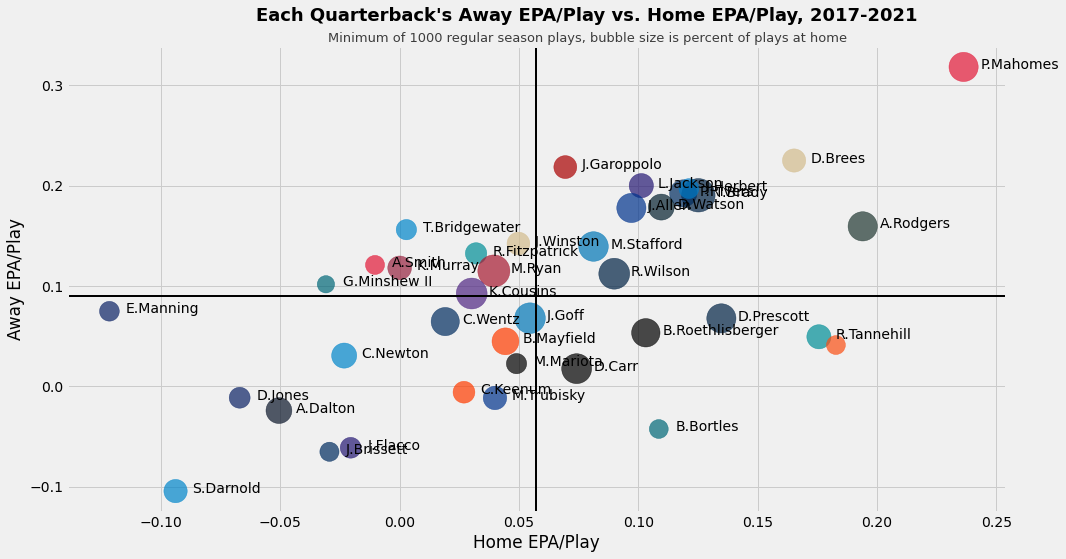

In [79]:
fig, ax = plt.subplots(figsize=(15,8))

ax.axvline(qb_epa['home_epa'].mean(), color='black', lw = 2)
ax.axhline(qb_epa['away_epa'].mean(), color='black', lw = 2)

ax.scatter(qb_epa["home_epa"], qb_epa["away_epa"], 
           alpha=.7, 
           s = qb_epa.home_perc/1.7,
           color=qb_epa.team_color)
ax.text(x=-0.06, y=0.36, s="Each Quarterback's Away EPA/Play vs. Home EPA/Play, 2017-2021", fontsize=18, weight='bold', va='bottom')
ax.text(x=-0.03, y=0.34, s='Minimum of 1000 regular season plays, bubble size is percent of plays at home', fontsize=13, alpha=0.75, va='bottom')
for line in range(0,qb_epa.shape[0]):
    if line == 7:
        pass
    else:
        plt.text(qb_epa.home_epa[line]+0.007, qb_epa.away_epa[line]-0.002, qb_epa.passer[line])
ax.set_xlabel("Home EPA/Play")
ax.set_ylabel("Away EPA/Play")